In [1]:
import torch
from torch.utils.data import DataLoader
from cellshape_cloud.vendor.chamfer_distance import ChamferLoss
from cellshape_cloud.pointcloud_dataset import (
    PointCloudDataset,
    SingleCellDataset,
)
from cellshape_cloud.cloud_autoencoder import CloudAutoEncoder

path = "/run/user/1128299809/gvfs/smb-share:server=rds.icr.ac.uk,share=data/DBI/DUDBI/DYNCESYS/mvries/ResultsAlma/TearingNetNew/nets/dgcnn_foldingnet_128_001.pt"

In [2]:
model = CloudAutoEncoder(
    num_features=128,
    k=20,
    encoder_type="dgcnn",
    decoder_type="foldingnetbasic",
)
checkpoint = torch.load(path)
model_dict = model.state_dict()  # load parameters from pre-trained FoldingNet

model.load_state_dict(checkpoint["model_state_dict"])
checkpoint["loss"]

23.386899400926882

In [3]:
root_dir = "/home/mvries/Documents/Datasets/OPM/SingleCellFromNathan_17122021/"
df = "/home/mvries/Documents/Datasets/OPM/SingleCellFromNathan_17122021/all_cell_data.csv"
dataset = SingleCellDataset(df, root_dir, cell_component="cell")

dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

In [4]:
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()
all_feat = []
all_outputs = []
all_inputs = []
labels = []
serial_numbers = []
for data in tqdm(dataloader):
    inputs = data[0]
    lab = data[1]
    ser_num = data[3]
    inputs = inputs.to(device)
    batch_size = inputs.shape[0]

    output, features = model(inputs)
    all_inputs.append(torch.squeeze(inputs).detach().cpu().numpy())
    all_outputs.append(torch.squeeze(output).detach().cpu().numpy())
    all_feat.append(torch.squeeze(features).detach().cpu().numpy())
    labels.append(lab[0])
    serial_numbers.append(ser_num[0])

100%|████████████████████████████████████| 70167/70167 [10:54<00:00, 107.13it/s]


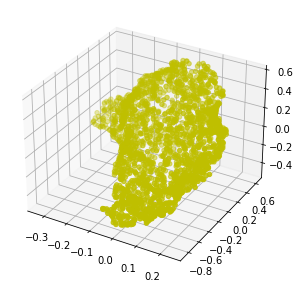

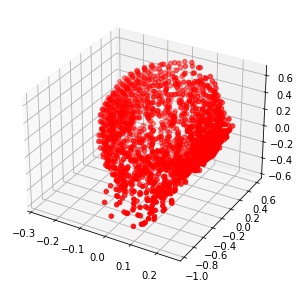

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

number = 4026
points = all_inputs[number]

outs = all_outputs[number]

fig = plt.figure(figsize=(5, 5))

ax = plt.axes(projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c="y", marker="o", s=20)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection="3d")
ax.scatter(outs[:, 0], outs[:, 1], outs[:, 2], c="r", marker="o", s=20)